In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import h5py
from matplotlib import animation
from matplotlib import cm
from mpl_toolkits import mplot3d
import os,sys
sys.path.append('/Users/ajc/Core/PyScript')
import readdata as rd
import seaborn as sns

In [2]:
path_root='/Users/ajc/Core/simulations/production/streams/'
#path_root='/Users/ajc/FUSE/simulations/production/streams/'
path = path_root

In [3]:
# Tracer

dir_name=['SIM_13', 'SIM_19']
path = [os.path.join(path_root,d) for d in dir_name]

sim =['S1_dx250m_min100m', 'S1_dx500m_min100m', 'S1_dx1000m_min100m',  'S1_dx10000m_min100m']
#sim =['S1_dx250m_min200m', 'S1_dx500m_min200m', 'S1_dx1000m_min200m',  'S1_dx10000m_min200m']
sim =['S2_dx250m_min100m', 'S2_dx10000m_min100m', 'S1_dx250m_min100m', 'S1_dx10000m_min100m']


T_Simulations = [os.path.join(path[0],s) for s in sim]


# BGC
sim =['HE1_BGC_dx250m_min200m', 'HE1_BGC_dx500m_min200m', 'HE1_BGC_dx1000m_min200m',  
      'HE1_BGC_dx10000m_min200m']

sim =['HE1_BGC_dx250m_min200m', 'HE1_BGC_dx10000m_min200m']

T_components = [(1,'Tracer1'), (2,'Tracer2')]
BGC_components = [(1,'DOM1'), (3,'NO3-'),(2,'O2(aq)')]

BGC_Simulations = [os.path.join(path[1],s) for s in sim]

Simulations = [T_Simulations , BGC_Simulations]

Simulations

[['/Users/ajc/Core/simulations/production/streams/SIM_13/S2_dx250m_min100m',
  '/Users/ajc/Core/simulations/production/streams/SIM_13/S2_dx10000m_min100m',
  '/Users/ajc/Core/simulations/production/streams/SIM_13/S1_dx250m_min100m',
  '/Users/ajc/Core/simulations/production/streams/SIM_13/S1_dx10000m_min100m'],
 ['/Users/ajc/Core/simulations/production/streams/SIM_19/HE1_BGC_dx250m_min200m',
  '/Users/ajc/Core/simulations/production/streams/SIM_19/HE1_BGC_dx10000m_min200m']]

In [4]:
# = np.concatenate([SimNBGC, SimBGC])
Colors = ['r','k','b','g','gray', 'm']
#Sim_dis = [r'NBGC ($\alpha$=1E-4)',r'NBGC ($\alpha$=2.5E-4)',r'BGC ($\alpha$=1E-4)',r"BGC ($\alpha$=2.5E-4)"]
Sim_dis = ['250 m', '500 m','1000 m ','segment length']
T_Sim_label = [r'250 m,  $\alpha$', r'seg. length, $\alpha$', r'250 m,  = 2.5 $\alpha$',
           r'seg. length, 2.5 $\alpha$']
T_Sim_label = ['HR_LE', 'SL_LE', 'HR_HE', 'SL_HE']
Sim_label = ['HR_HE', 'SL_HE']

In [5]:
marks = ['solid','dashed', 'dotted', 'dashdot']



In [6]:
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#%matplotlib qt
outfile='/Users/ajc/Core/PostProcessing/ReactiveTransport/2021/Q2/'
def get_discharge_fromfile(comp=1):
    fig, axs = plt.subplots(1,2, figsize=(4,3), facecolor='w', edgecolor='k',gridspec_kw={'width_ratios':[1,1]})
    fig.subplots_adjust(hspace =.02, wspace=1.02)
    plt.tight_layout()
    axs = axs.ravel()
    to_micro = 1#1e+6
    for i,sim in enumerate(Simulations):

        for j,Tc in enumerate(components):
            print (sim,Tc)
            infile = os.path.join(sim,'surface-outlet.dat')
            
            time = np.loadtxt(infile,usecols=0,skiprows=11)/(86400.)
            data = np.loadtxt(infile,usecols=Tc[0],skiprows=11)
            #print (data[:5])
            
            axs[j].plot(time,1e-3*data*to_micro,color=Colors[i], linestyle=marks[j], label = Sim_dis[i])

            axs[j].set_xlabel('Time [d]', fontsize=12,fontweight='normal')
            #axs[j].set_ylabel('Concentration [$\mu$M]', fontsize=12,fontweight='normal')
            axs[j].set_ylabel('Concentration [Moles/L]', fontsize=12,fontweight='normal')
            axs[j].set_title(Tc[1])
            #axs[j].set_yticklabel_format(style='sci', axis='y', scilimits=(0,0),useMathText=True)
            if j ==0:
                axs[j].legend(loc='upper left',fontsize=7)
            
    plt.tight_layout()
    #plt.savefig(outfile + '%s_%s_dtmean5.png'%(dir_name[0],dir_name[1]),dpi=200)
    #plt.savefig(outfile + 'BTC-surfacefull.png',dpi=200)


In [7]:
#get_discharge_fromfile(comp=1)

In [75]:

#%matplotlib qt
outfile='/Users/ajc/Core/PostProcessing/ReactiveTransport/2021/Q2/'
def get_discharge_fromfile_singletracer():
    fig, axs = plt.subplots(1,1,figsize=(6,4))
    #fig, axs = plt.subplots(1,1, figsize=(6,5), facecolor='w', edgecolor='k',gridspec_kw={'width_ratios':[1]})
    #fig.subplots_adjust(hspace =.02, wspace=1.02)
    plt.tight_layout()
    #axs = axs.ravel()
    to_micro = 1e+6
    components = [(1,'Tracer1')]
    for i,sim in enumerate(T_Simulations):

        for j,Tc in enumerate(components):
            print (sim,Tc)
            infile = os.path.join(sim,'surface-outlet.dat')
            
            time = np.loadtxt(infile,usecols=0,skiprows=11)/(86400.)
            data = np.loadtxt(infile,usecols=Tc[0],skiprows=11)
            #print (data[:5])
            #l1, l2 = len(time), len(data)
            #l = min(l1,l2)
            if i < 2:
                axs.plot(time,1e-3*data*to_micro,color=Colors[i], linestyle=marks[0], linewidth=1., label = T_Sim_label[i])
            else:
                axs.plot(time,1e-3*data*to_micro,color=Colors[i-2], linestyle=marks[1], linewidth=1.0, label = T_Sim_label[i])
            plt.yscale('log')
            #plt.xscale('log')
            #axs.set_ylim(1E-8,1E6)
            #axs.set_yticks(np.arange(10**-8,10**6,10))
            plt.ylim( (10**-8,10**6) )
            axs.set_xlabel('Time [d]', fontsize=12,fontweight='normal')
            axs.set_ylabel('Concentration [$\mu$M]', fontsize=12,fontweight='normal')
            #axs.set_ylabel('Concentration [M/L]', fontsize=12,fontweight='normal')
            #axs.set_title(Tc[1])
            #axs.ticklabel_format(style='sci', axis='y', scilimits=(0,0),useMathText=True)
            
            axs.legend(loc='upper right',fontsize=10)
            
            #axs.axvspan(27, 30, ymin=1e-7, ymax=0.38, alpha=0.05, color='grey')
            #axs.axvspan(19.5, 20.7, ymin=1e-7, ymax=0.38, alpha=0.05, color='grey')
    plt.tight_layout()
    #plt.savefig(outfile + '%s_%s_dtmean5.png'%(dir_name[0],dir_name[1]),dpi=200)
    #plt.savefig(outfile + 'S1_btc-cT_selectedstreams_1.png',dpi=200)
    plt.savefig(outfile + 'BTC-cT_SIM13.png',dpi=300)



/Users/ajc/Core/simulations/production/streams/SIM_13/S2_dx250m_min100m (1, 'Tracer1')
/Users/ajc/Core/simulations/production/streams/SIM_13/S2_dx10000m_min100m (1, 'Tracer1')
/Users/ajc/Core/simulations/production/streams/SIM_13/S1_dx250m_min100m (1, 'Tracer1')
/Users/ajc/Core/simulations/production/streams/SIM_13/S1_dx10000m_min100m (1, 'Tracer1')


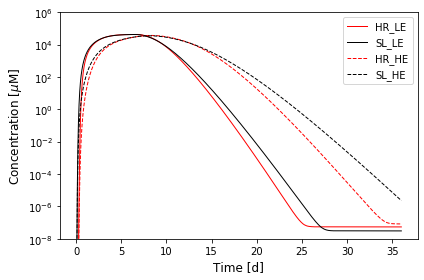

In [76]:
get_discharge_fromfile_singletracer()

array([1.e-08, 2.e+05, 4.e+05, 6.e+05, 8.e+05])